# Transform Allen image from NRRD to NIfTI-1
This notebook 1) transforms format of a volume file from NRRD to NIfTI-1, and 2) changes orientaion of an original NRRD-image of Allen Institute for Brain Science (AIBS) from PIR (posterior, inferior, right) to RAS (right, anterior, superior) that is typically used in NIfTI standard. Orientation information is stored both in s- and q-form. Also note that data type is changed from uint32 to uint16 when an input file is annotation volume (AV) with its ID remapped.

- input file is one of the following
    - annotation_100.nrrd # the original AV from AIBS
    - average_template_100.nrrd # the original average template from AIBS
    - annotation_100_csf/gray/root/white.nrrd # Get_gray_white_csf_volume.ipynb
- output file
    - input filename + '_RAS.nii'

In [38]:
dir_data = 'data'

fn_input = 'annotation_100_remapID.nrrd'

<class 'numpy.uint16'>


In [37]:
import os
import nrrd
import numpy as np
import copy
import nibabel as nib

if fn_input == 'annotation_100.nrrd':
    dtype = np.uint32 # the original data type
else:
    dtype = np.uint16
print(dtype)

fn_wo_ext = os.path.splitext(fn_input)[0]
fn_output = fn_wo_ext + '_RAS.nii'

affine_from_PIR_to_RAS = np.array([[0,0,1,-57], [-1,0,0,54],[0,-1,0,0],[0,0,0,1]])

# Data transformation
- file format from NRRD to NIfTI-1
- copy sform affine matrix to that of qform
- data type from uint32 to uint16 when appropriate

In [39]:
img, _ = nrrd.read(os.path.join(dir_data, fn_input))
img_nifti = nib.Nifti1Image(img.astype(dtype), affine_from_PIR_to_RAS)
sform_code = img_nifti.header.get_sform(coded=True)[1] # 2 indicates 'aligned to a template'
img_nifti.header.set_qform(affine_from_PIR_to_RAS, sform_code)
img_nifti.header.set_xyzt_units('mm',None) # unit for the original nrrd-image is micron.

# Save data

In [40]:
nib.save(img_nifti, os.path.join(dir_data,fn_output))

# Check data

In [41]:
print(img_nifti.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 132  80 114   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : -0.5
quatern_c       : 0.5
quatern_d       : -0.5
qoffset_x       : -57.0
qoffset_y       : 54.0
qoffset_z       : 0.0
srow_x          : [  0.   0.   1. -57.]
srow_y     

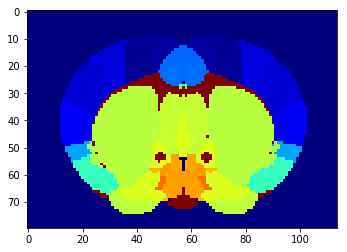

In [42]:
import matplotlib.pyplot as plt
plt.imshow(img_nifti.get_fdata()[50,:,:],cmap='jet')# jet prism
plt.clim(0,1000)